In [1]:
import os
# start the notebook in the root of the git repo, so that we can import our stuff
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('..')

from src.simulation.sim import *
from src.simulation.initsim import gen_prior_param, init_simulation
from src.cli.simulations import first_k_with_value_then_random, flist_to_str
from src.simulation.graphs import *
from src.simulation.runsim import run_ensemble, run_simulation, make_progress
%matplotlib inline
%load_ext autoreload
%autoreload 2
import scipy as sp
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 300

from src.simulation.sim import *
from src.analyse.analyse import *
# import graph_tool as gt
import pandas as pd
import powerlaw as pl
import plotly.io as pio
from scipy.optimize import curve_fit
pio.renderers.default = 'notebook_connected'
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple, defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300




(ipykernel_launcher.py:76253): Gtk-WARNING **: 14:08:16.384: Locale not supported by C library.
	Using the fallback 'C' locale.


In [2]:
Result = namedtuple('Result', ['partisans', "sims"])
Sim = namedtuple("Sim", ["asymptotic", "non_partisans_mean"])
n = 10
bias = 0.6           # theta0
partisan_mean = 0.3  # thetap
partisan_sd = 0.01

num_partisans = 1
disruption = num_partisans
max_steps = 10000
num_coins = 1
true_bias = bias
learning_rate = 0.25

frac_partisans = num_partisans / n


In [3]:
def gen_with_partisans(partisan_val, num_partisans, n, persuadable_range):
    val = first_k_with_value_then_random(partisan_val, num_partisans)
    return flist_to_str(gen_prior_param(val, n, range=persuadable_range))

sim_params = dict(
    prior= {
        "mean": gen_with_partisans(partisan_mean, num_partisans, n, persuadable_range=(0, 1)),
        "sd": gen_with_partisans(partisan_sd, num_partisans, n, persuadable_range=(0.2, 0.8)),
        "n": n,
        "mean_range": (0, 1),
        "sd_range": (0.2, 0.8),
    },
    max_steps= max_steps,
    true_bias= bias,
    tosses_per_iteration= 1,
    learning_rate= learning_rate,
    asymptotic_learning_max_iters= 99,
    DWeps= 1,
    disruption= 1,
    log= True,  # need to log to get mean_list
    coinslist= None,  # coin list needs to be None to have different simulations
    break_on_asymptotic_learning= False,
)

In [7]:
ba_10 = gen_bba_graph(10,3,lambda:1)

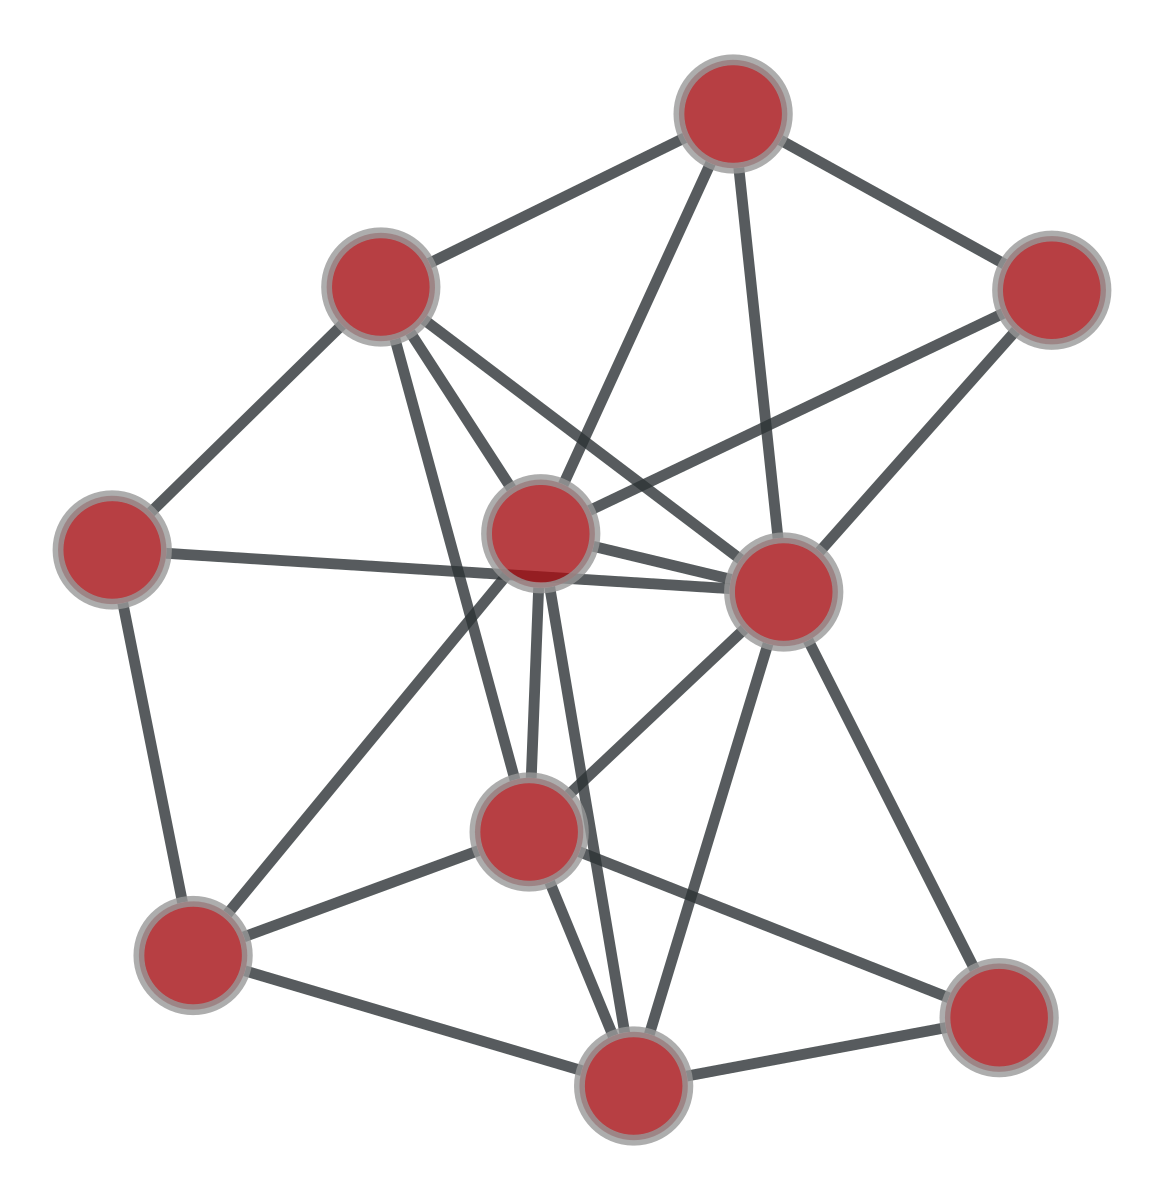

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2945a39d0, at 0x2945a3640>

In [9]:
gt.draw.graph_draw(ba_10)

In [ ]:
sim = run_simulation(gen_bba_graph(100,3,lambda: 1 ), **sim_params)

# fix the results -- namely some 
# things that should be np.array but are lists of np.array
results_dict = {k: v for k, v in zip(SimResults._fields, sim)}
from src.analyse.results import results_array_params
for k in results_array_params:
    results_dict[k] = np.asarray(results_dict[k])
sim = SimResults(**results_dict)

args = {
    "size": 100,
    "bias": bias,
    "disruption": disruption,
}

